# STAT207 Final Project - HEART DISEASE


EVELINA ASTRANSKAS, DEEYA PATEL, ELLIE, NATASHA NANGIA, AADHYA MAVANI

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Introduction

Cardiovascular diseases, also known as CVDs, are one of the leading causes of death globally, which heavily emphasizes the importance of detecting these diseases early, managing them, and preventing any adverse health effects that occur because of them. As technology becomes more advanced, machine learning models can provide an opportunity to improve the prediction of heart diseases based on a set of clinical features. The motivation for building a predictive model, specifically for the binary response variable "HeartDisease," lies in its potential ability to help healthcare professionals and individuals in assessing the risk of cardiovascular events, who thus, might find this model useful. By leveraging predictive analytics that the model can supply, these professionals can identify high-risk patients for targeted interventions, such as lifestyle modifications or medical treatments, thereby reducing the burden of CVD-related mortality and morbidity. Because of this, they are more likely to desire a classifier that is better at  classifying the "positives," because they would want to create preventive medicine. By accurately identifying individuals with heart disease, they can leverage data from their symptoms and treatment to when and how to intervene early enough with individuals at high risk of cardiovascular events. This will allow professional to make thorough treatment plans and suggestions such as lifestyle modifications, medication therapy, or referral to specialty care, to mitigate the progression of the disease and prevent adverse outcomes like heart attacks or strokes.

A study done by Krittanawong in 2020 pictures how performances have been made in using machine learning models to predict cardiovascular events, highlighting the ability our approach can have on the world of clinical practices. They provide  statistics about how the predictive ability of ML algorithms in cardiovascular diseases is promising, particularly SVM and boosting algorithms.In addition to that, a systematic review by Shameer et al. (2018) emphasized the importance of predictive modeling in identifying individuals at high risk of heart disease, thereby enabling targeted preventive interventions. From these two sources we can have a clear vision on why the predictive model that we make can be relevant to clinics and aid in improving patient outcomes. 

Our primary research is to build a predictive model that effectively predicts the presence or absence of heart disease in new datasets. Our secondary research goal is that we want Ideally, we would like to our chosen model to also yield reliable interpretative insights about the nature of the relationship between the explanatory variables of our choice which are Cholesterol, RestingBP, Age, RestingECG, and Sex, which encompass clinical and demographic factors known to influence cardiovascular risk. Cholesterol levels, which are a numerical variable, can help show signs of hypercholesterolemia, which is a major risk factor for cardiovascular disease. Analyzing resting blood pressure, also numerical, shows hypertension risk to uncover patterns in blood pressure management and its impact on heart disease. Age, a significant numerical factor, can portray patterns within specific age groups. Categorizing electrocardiogram results, a categorical variable, can show abnormalities in their heart rate which is important for identifying underlying heart disease risk factors. And lastly, analyzing gender, a categorical variable, can show its distribution of diseases that occur within them. These descriptive analytics will inform the development and interpretation of the predictive model.

## 2. Dataset Discussion

We got this dataset from Kaggle on April 20th, 2024, which you can find [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data). The rows represent different patients. The dataset was created by combining 5 independent heart datasets over 11 common feautures, specifically the Cleveland, Hungary, Switzerland, Long Beach, and Stalog dataset.

The dataset doesn't encompass all common features of heart disease, only 11. In addition there are only 918 patients recorded. The incompleteness of this dataset can influence the actions taken by the individuals mentioned in the research motivation. If important observations are missing, the insights derived from the analysis may be limited in their applicability or accuracy.

The five variables I intend to explore in this analysis are Cholesterol, RestingBP, Age, RestingECG, and Sex. The Cholesterol represents the serum cholesterol in mm/dl. The RestingBP represents the resting blood pressure of the patient in mm HG. The RestingECG represents the resting electrodiagram results being Normal, ST (having ST-T wave abnormality), and LVH (showing probable or definite left ventricular hypertrophy by Estes' criteria). The Age is the age of patient, while the sex is the sex of the patient (M:Male, F:Female).

In [72]:
df_original = pd.read_csv("heart.csv")
df_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
length = df_original.shape[0]
length

918

In [74]:
df = df_original[["HeartDisease", "Cholesterol", "RestingBP", "RestingECG", "Age", "Sex"]]
df.head()

,HeartDisease,Cholesterol,RestingBP,RestingECG,Age,Sex
0,0,289,140,Normal,40,M
1,1,180,160,Normal,49,F
2,0,283,130,ST,37,M
3,1,214,138,Normal,48,F
4,0,195,150,Normal,54,M


## 3. Dataset Cleaning

In [75]:
df.isna().sum()

HeartDisease    0
Cholesterol     0
RestingBP       0
RestingECG      0
Age             0
Sex             0
dtype: int64

In [76]:
df["HeartDisease"] = df["HeartDisease"].replace({0: False, 1: True})
df.head()

/var/folders/qk/pkv76djx5tv39gn0x62gnmfm0000gn/T/ipykernel_50016/1220747166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HeartDisease"] = df["HeartDisease"].replace({0: False, 1: True})


,HeartDisease,Cholesterol,RestingBP,RestingECG,Age,Sex
0,False,289,140,Normal,40,M
1,True,180,160,Normal,49,F
2,False,283,130,ST,37,M
3,True,214,138,Normal,48,F
4,False,195,150,Normal,54,M


In [77]:
df.dtypes

HeartDisease      bool
Cholesterol      int64
RestingBP        int64
RestingECG      object
Age              int64
Sex             object
dtype: object

In [78]:
np.unique(df["RestingECG"].values)

array(['LVH', 'Normal', 'ST'], dtype=object)

In [79]:
np.unique(df["Sex"].values)

array(['F', 'M'], dtype=object)

There are no explicit and implicit missing values in our dataset. All the columns match the data types and there are no missing values from the categorical variables.

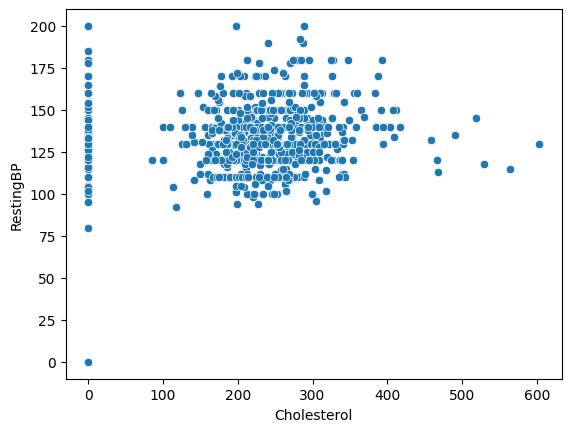

In [80]:
sns.scatterplot(x="Cholesterol", y="RestingBP", data=df)
plt.show()

In [81]:
df = df[df["Cholesterol"] > 50]

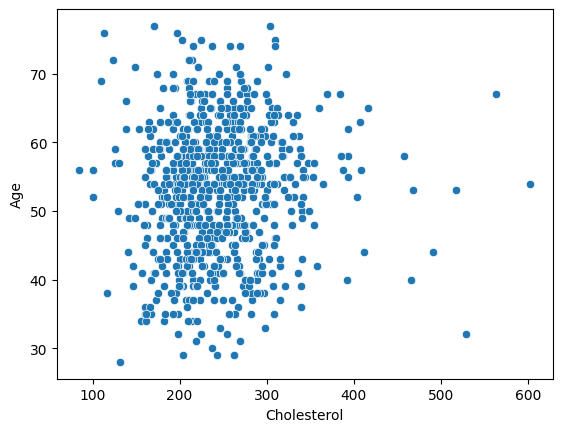

In [82]:
sns.scatterplot(x="Cholesterol", y="Age", data=df)
plt.show()

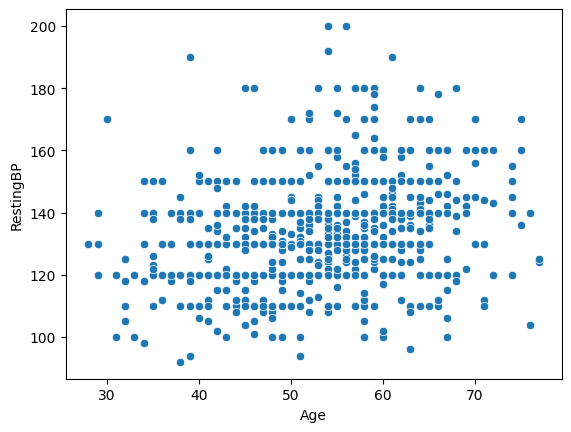

In [83]:
sns.scatterplot(x="Age", y="RestingBP", data=df)
plt.show()

In [84]:
newlength = df.shape[0]
length - newlength

172

We decided to drop any outliers that had a Cholesterol and RestingBP of 0, which ended up being 172 observations. The pro of dropping this outlier is that we will most likely get better performance for the non-outlier points by doing this. On the other hand, a con of dropping this row is that our data is not as representative of the full original dataset.

## 4. Preliminary Analysis

### Relationships between the Response Variable and the Explanatory Variables

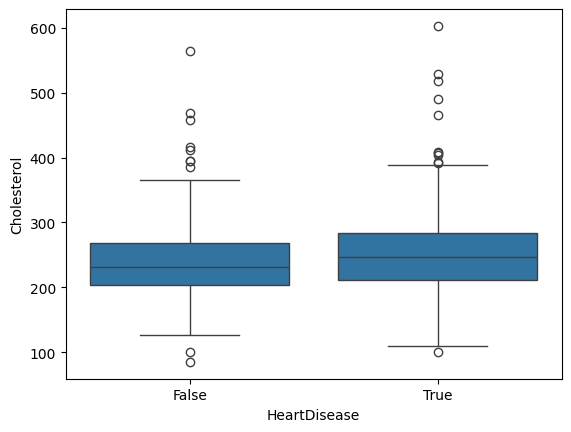

In [85]:
sns.boxplot(x="HeartDisease", y="Cholesterol", data=df)
plt.show()

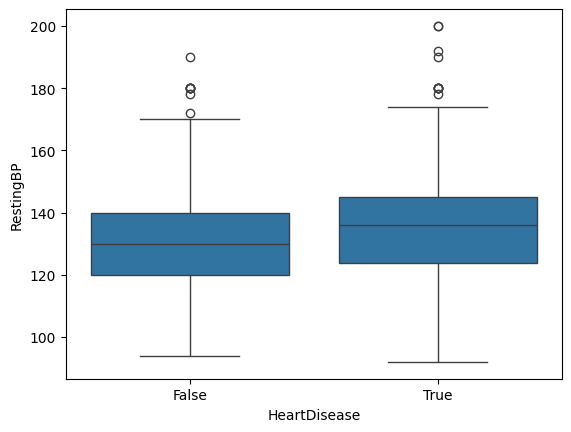

In [86]:
sns.boxplot(x="HeartDisease", y="RestingBP", data=df)
plt.show()

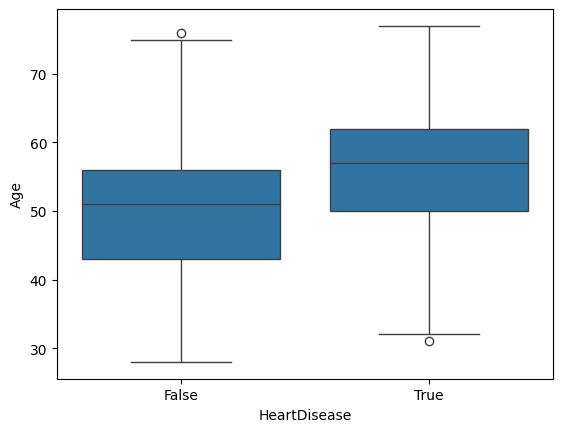

In [87]:
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.show()

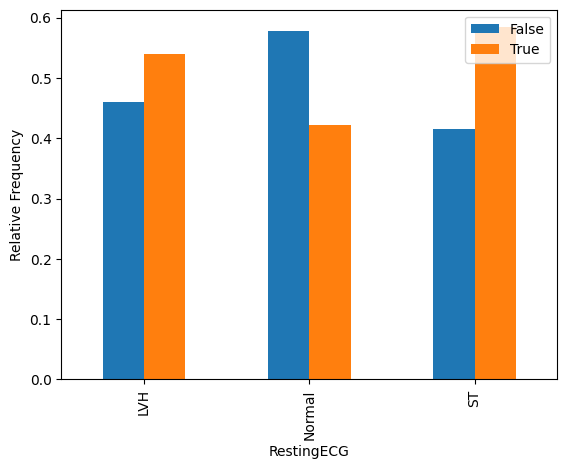

In [88]:
temp = pd.crosstab(df["RestingECG"], df["HeartDisease"], normalize="index")
temp.plot.bar()
plt.legend(loc="upper right")
plt.ylabel("Relative Frequency")
plt.show()

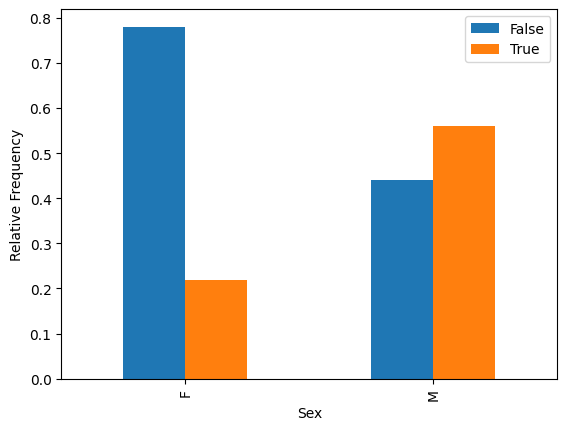

In [89]:
temp = pd.crosstab(df["Sex"], df["HeartDisease"], normalize="index")
temp.plot.bar()
plt.legend(loc="upper right")
plt.ylabel("Relative Frequency")
plt.show()

Age, RestingECG, and Sex have the strongest relationships with HeartDisease. Age has at least one color that had two bars that were different in height. Both RestingECG and Sex have at least two IQR boxes that are well-separated with distinct medians.

Cholesterol and RestingBP have the weakest relationships with HeartDisease. Both of these variables have IQR boxes and medians that all seem roughly similar.

### Relationships between Explanatory Variable Pairs

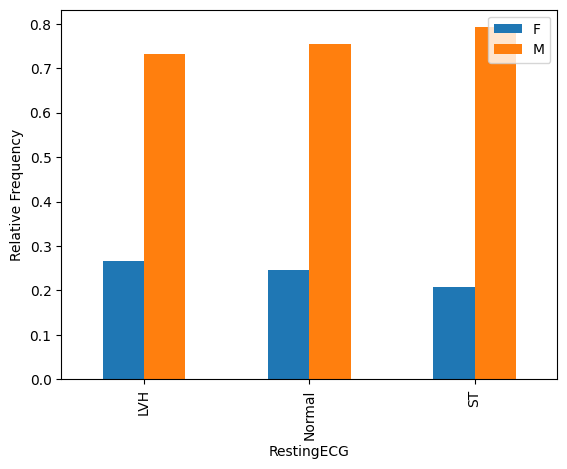

In [90]:
temp = pd.crosstab(df["RestingECG"], df["Sex"], normalize="index")
temp.plot.bar()
plt.legend(loc="upper right")
plt.ylabel("Relative Frequency")
plt.show()

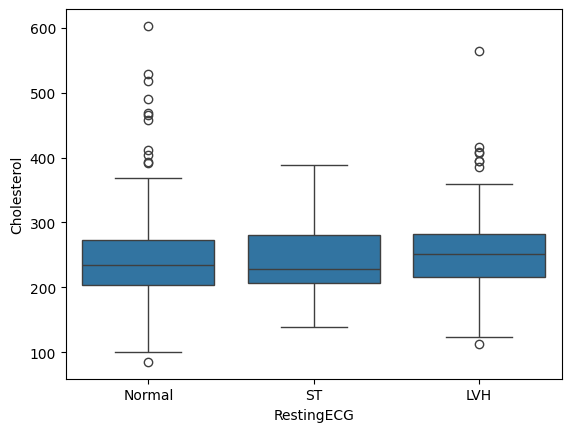

In [91]:
sns.boxplot(x="RestingECG", y="Cholesterol", data=df)
plt.show()

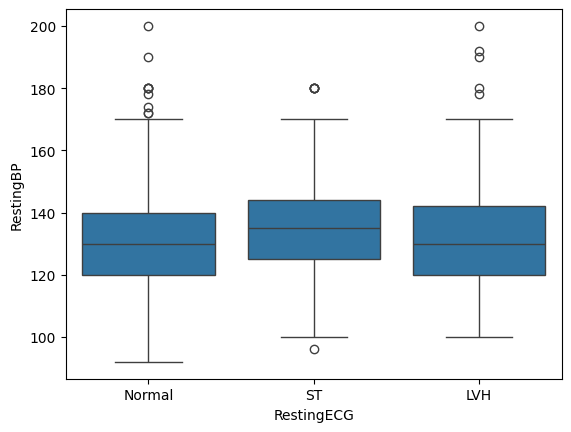

In [92]:
sns.boxplot(x="RestingECG", y="RestingBP", data=df)
plt.show()

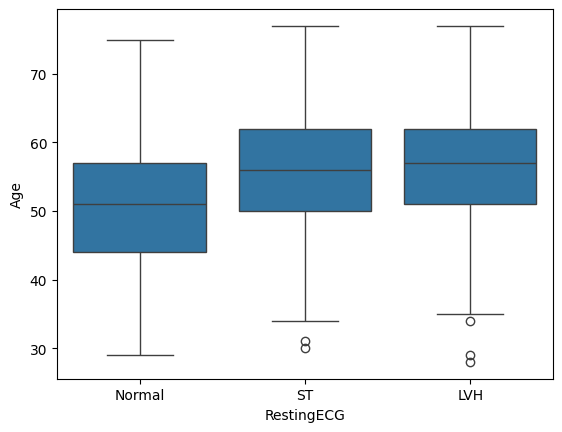

In [93]:
sns.boxplot(x="RestingECG", y="Age", data=df)
plt.show()

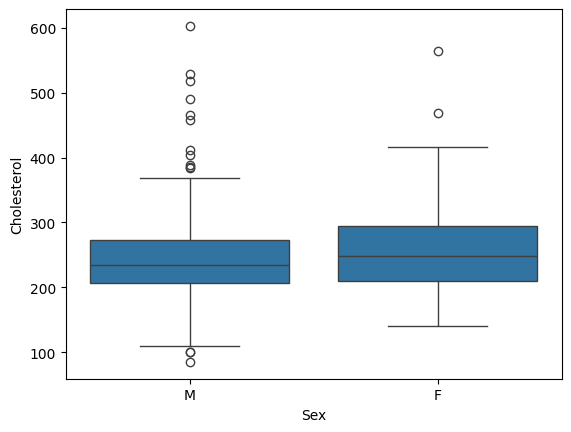

In [94]:
sns.boxplot(x="Sex", y="Cholesterol", data=df)
plt.show()

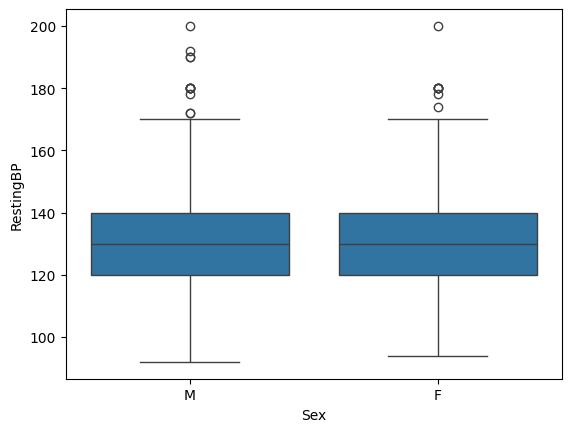

In [95]:
sns.boxplot(x="Sex", y="RestingBP", data=df)
plt.show()

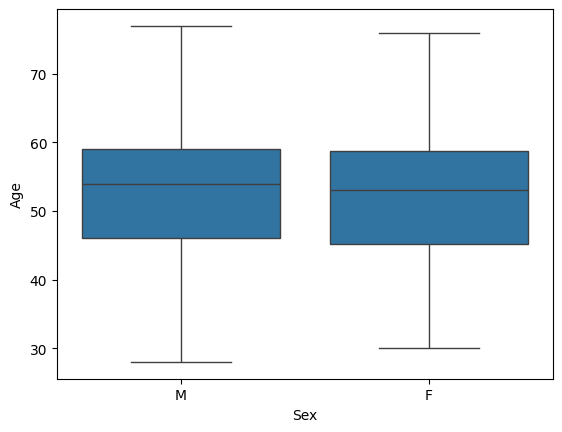

In [96]:
sns.boxplot(x="Sex", y="Age", data=df)
plt.show()

Age and RestingECG have a strong association with each other because they have at least two IQR boxes that are well-separated with distinct medians.

#### Interaction Effects

In [97]:
df['HeartDisease'] = df['HeartDisease'].replace({'True':1, 'False':0})
df.head()

,HeartDisease,Cholesterol,RestingBP,RestingECG,Age,Sex
0,False,289,140,Normal,40,M
1,True,180,160,Normal,49,F
2,False,283,130,ST,37,M
3,True,214,138,Normal,48,F
4,False,195,150,Normal,54,M


In [98]:
df['HeartDisease'] = df['HeartDisease'].astype(bool)

In [99]:
df['HeartDisease'] = df['HeartDisease'].astype(int)
df.head()

,HeartDisease,Cholesterol,RestingBP,RestingECG,Age,Sex
0,0,289,140,Normal,40,M
1,1,180,160,Normal,49,F
2,0,283,130,ST,37,M
3,1,214,138,Normal,48,F
4,0,195,150,Normal,54,M


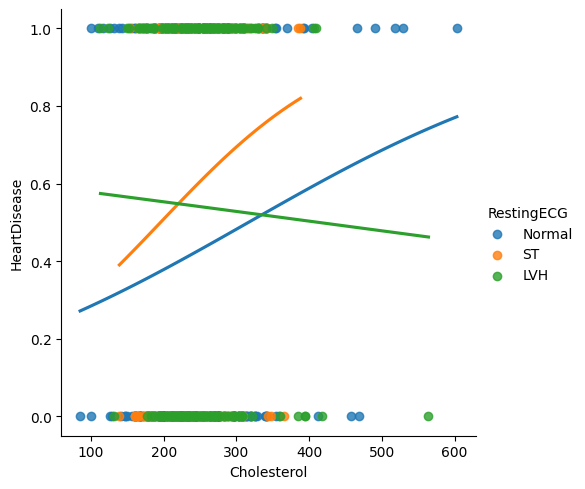

In [100]:
sns.lmplot(x="Cholesterol", 
           y='HeartDisease',
           hue="RestingECG",
           data = df,
           logistic=True,
           ci=False)
plt.show()

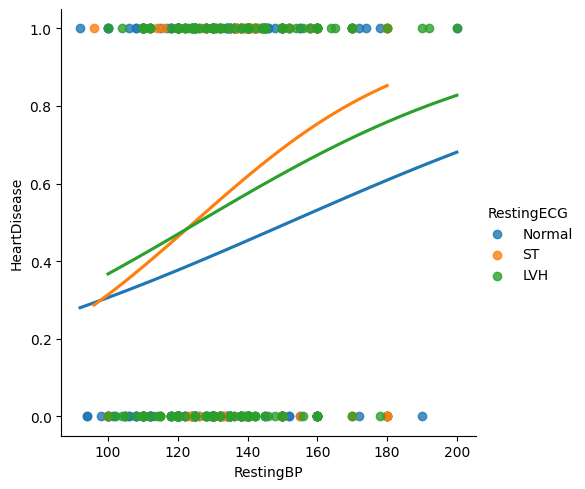

In [101]:
sns.lmplot(x="RestingBP", 
           y='HeartDisease',
           hue="RestingECG",
           data = df,
           logistic=True,
           ci=False)
plt.show()

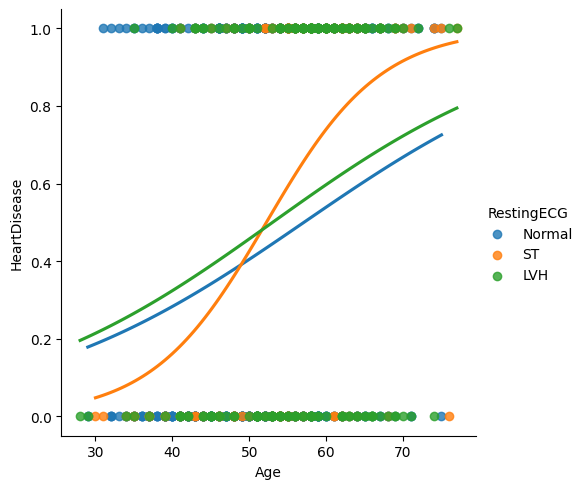

In [102]:
sns.lmplot(x="Age", 
           y='HeartDisease',
           hue="RestingECG",
           data = df,
           logistic=True,
           ci=False)
plt.show()

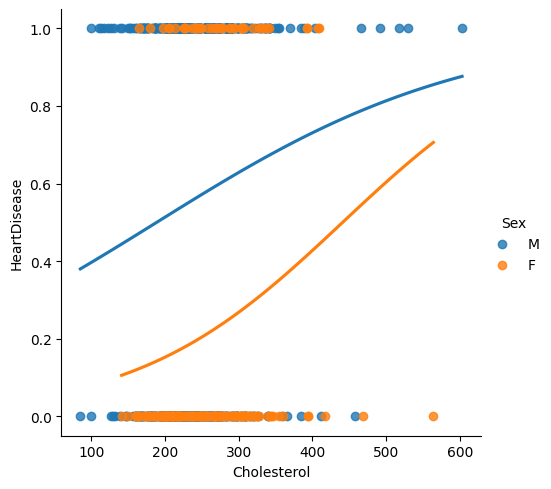

In [103]:
sns.lmplot(x="Cholesterol", 
           y='HeartDisease',
           hue="Sex",
           data = df,
           logistic=True,
           ci=False)
plt.show()

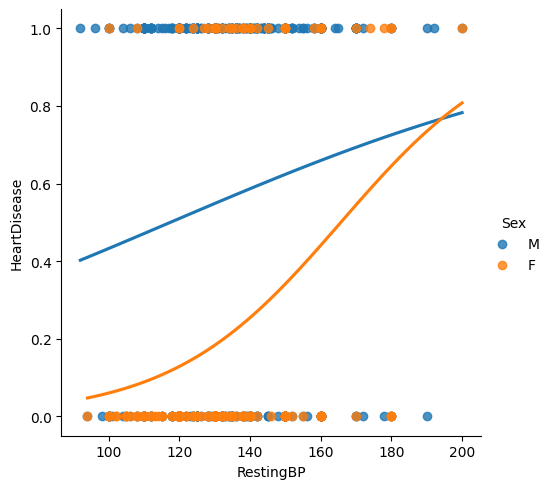

In [104]:
sns.lmplot(x="RestingBP", 
           y='HeartDisease',
           hue="Sex",
           data = df,
           logistic=True,
           ci=False)
plt.show()

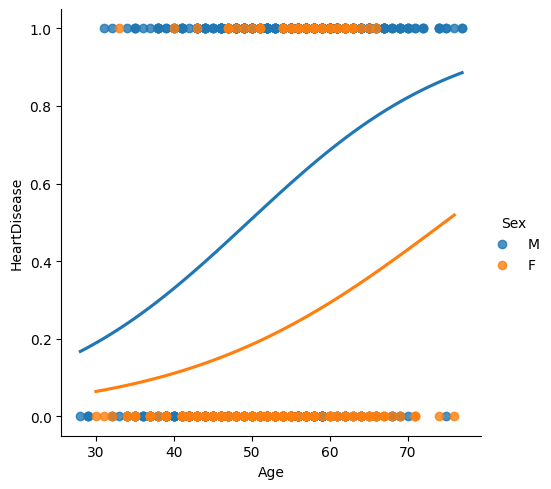

In [105]:
sns.lmplot(x="Age", 
           y='HeartDisease',
           hue="Sex",
           data = df,
           logistic=True,
           ci=False)
plt.show()

All of the numerical explanatory variable and categorical explanatory variable pairs have an interaction. However, some pairs have a stronger interaction with each other than others. For example, in the Cholesterol and RestingECG plot, the interaction is clearly strong, however, the RestingBP and RestingECG plot while it still shows an interaction, it is clearly weaker because the slopes are more similar to each other than in the plot with Cholesterol and RestingECG.

## 5. Model Data Preprocessing

### Feature Matrix and Target Array

In [106]:
X = df.drop(["HeartDisease"], axis=1)
X.head()

,Cholesterol,RestingBP,RestingECG,Age,Sex
0,289,140,Normal,40,M
1,180,160,Normal,49,F
2,283,130,ST,37,M
3,214,138,Normal,48,F
4,195,150,Normal,54,M


In [107]:
y = df['HeartDisease']

### Explanatory Variable Scaling

In [108]:
scaler_training = StandardScaler()
numerical_expl_vars = X[["Cholesterol", "RestingBP", "Age"]]

scaled_expl_vars = scaler_training.fit_transform(numerical_expl_vars)
numerical_expl_vars = pd.DataFrame(scaled_expl_vars, columns=numerical_expl_vars.columns)
numerical_expl_vars.head()

,Cholesterol,RestingBP,Age
0,0.750494,0.403980,-1.356073
1,-1.093405,1.561980,-0.408656
2,0.648995,-0.175019,-1.671879
3,-0.518244,0.288180,-0.513925
4,-0.839657,0.982980,0.117686


### Indicator Variables

In [109]:
categorical_expl_vars = X[["RestingECG", "Sex"]]
X_dummies = pd.get_dummies(categorical_expl_vars, drop_first=True, dtype=int)
X_dummies.head()

,RestingECG_Normal,RestingECG_ST,Sex_M
0,1,0,1
1,1,0,0
2,0,1,1
3,1,0,0
4,1,0,1


In [110]:
numerical_expl_vars.reset_index(drop=True, inplace=True)
X_dummies.reset_index(drop=True, inplace=True)

In [111]:
X = pd.concat([numerical_expl_vars, X_dummies], axis=1)
X.head()

,Cholesterol,RestingBP,Age,RestingECG_Normal,RestingECG_ST,Sex_M
0,0.750494,0.403980,-1.356073,1,0,1
1,-1.093405,1.561980,-0.408656,1,0,0
2,0.648995,-0.175019,-1.671879,0,1,1
3,-0.518244,0.288180,-0.513925,1,0,0
4,-0.839657,0.982980,0.117686,1,0,1


## 6. Backwards Elimination with k-Fold Cross-Validation

In [112]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 207)

In [113]:
from sklearn.metrics import roc_auc_score
full_mod = smf.logit(formula='HeartDisease~Cholesterol+RestingBP+RestingECG+Age+Sex',data=df_train).fit()
phat_test = full_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.564000
         Iterations 6


0.6721340702442502

In [114]:
current_mod = smf.logit(formula='HeartDisease~RestingBP+RestingECG+Age+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.575602
         Iterations 6


0.681226600106971

In [115]:
current_mod = smf.logit(formula='HeartDisease~Cholesterol+RestingECG+Age+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.569197
         Iterations 6


0.6651809591727581

In [116]:
current_mod = smf.logit(formula='HeartDisease~Cholesterol+RestingBP+Age+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.565395
         Iterations 6


0.6662506685683722

In [117]:
current_mod = smf.logit(formula='HeartDisease~Cholesterol+RestingBP+RestingECG+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.604576
         Iterations 6


0.626314851132109

In [118]:
current_mod = smf.logit(formula='HeartDisease~Cholesterol+RestingBP+RestingECG+Age',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.620282
         Iterations 5


0.6348725262970226

Keep going with the backwards elimination since the model without Cholesterol had a higher AUC than the full model.

In [119]:
best_mod1 = smf.logit(formula='HeartDisease~RestingBP+RestingECG+Age+Sex',data=df_train).fit()
phat_test = best_mod1.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.575602
         Iterations 6


0.681226600106971

In [120]:
current_mod = smf.logit(formula='HeartDisease~RestingECG+Age+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.581588
         Iterations 6


0.6747192012836511

In [121]:
current_mod = smf.logit(formula='HeartDisease~RestingBP+Age+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.577444
         Iterations 6


0.6736494918880371

In [122]:
current_mod = smf.logit(formula='HeartDisease~RestingBP+RestingECG+Sex',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.615494
         Iterations 5


0.6326439650561597

In [123]:
current_mod = smf.logit(formula='HeartDisease~RestingBP+RestingECG+Age',data=df_train).fit()
phat_test = current_mod.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.625495
         Iterations 5


0.6411124977714387

After completing the backwards elimination, the model that removed Cholesterol, is the best model, resulting in the highest TEST AUC. 

In [124]:
best_mod = smf.logit(formula='HeartDisease~RestingBP+RestingECG+Age+Sex',data=df_train).fit()
phat_test = best_mod1.predict(df_test)
auc = roc_auc_score(y_true=df_test['HeartDisease'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.575602
         Iterations 6


0.681226600106971

The best model resulted in a test AUC of 0.6812.

## 7. Best Model Discussion

In [125]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 207)

In [126]:
from sklearn.linear_model import LogisticRegression
X = df_train[['RestingBP','Age', 'RestingECG','Sex']]
X.head()

,RestingBP,Age,RestingECG,Sex
894,130,58,Normal,F
245,120,54,Normal,M
71,130,44,Normal,M
855,180,68,LVH,M
235,120,39,Normal,M


In [127]:
y = df_train['HeartDisease']
y.head()

894    0
245    0
71     0
855    1
235    0
Name: HeartDisease, dtype: int64

In [128]:
X=pd.get_dummies(X, drop_first=True, dtype=int)
X.head()


,RestingBP,Age,RestingECG_Normal,RestingECG_ST,Sex_M
894,130,58,1,0,0
245,120,54,1,0,1
71,130,44,1,0,1
855,180,68,0,0,1
235,120,39,1,0,1


In [129]:
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  596
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.1666
Time:                        00:32:01   Log-Likelihood:                -343.06
converged:                       True   LL-Null:                       -411.63
Covariance Type:            nonrobust   LLR p-value:                 7.210e-28
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.1216      0.952     -7.478      0.000      -8.988      -5.255
RestingECG[T.Normal]    -0.2606      0.225     -1.159      0.246      -0.701       0.180
RestingECG[T.ST]         0.0628      0.301      0.208      0.835      -0.528       0.654
Sex[T.M]                 1.6677      0.234      7.131      0.000       1.209       2.126
RestingBP                0.0146      0.005      2.651      0.008       0.004       0.025
Age                      0.0734      0.011      6.514      0.000       0.051       0.096
========================================================================================
"""

### Equation
y = -7.1216 - 0.2606*RestingECG[T.Normal] - 0.0628*RestingECG[T.ST] + 1.6677*Sex[T.M] + 0.0146*RestingBP + 0.0734*Age

In [130]:
X.corr()

,RestingBP,Age,RestingECG_Normal,RestingECG_ST,Sex_M
RestingBP,1.000000,0.233126,-0.060910,0.075637,0.059773
Age,0.233126,1.000000,-0.258519,0.106035,0.046101
RestingECG_Normal,-0.060910,-0.258519,1.000000,-0.523021,-0.005292
RestingECG_ST,0.075637,0.106035,-0.523021,1.000000,0.033071
Sex_M,0.059773,0.046101,-0.005292,0.033071,1.000000


Looking at the remaining explanatory variables in the model, there appears not to be any issue with multicollinearity. This is because, assuming a correlation threshold of 0.7, all the correlations between the remaining explanatory variables are below the threshold. 

In [131]:
df_train['predictive_prob'] = best_mod.predict(df_train)
df_train[['predictive_prob','HeartDisease']].head()

,predictive_prob,HeartDisease
894,0.225946,0
245,0.499268,0
71,0.356289,0
855,0.896516,1
235,0.248956,0


In [132]:
df_test['predictive_prob'] = best_mod.predict(df_test)
df_test[['predictive_prob','HeartDisease']].head()

,predictive_prob,HeartDisease
600,0.665149,0
280,0.667789,0
544,0.296191,0
802,0.419586,0
512,0.262934,0


In [133]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true=df_test['HeartDisease'],
                                   y_score = df_test['predictive_prob'])

In [134]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_test['HeartDisease'],
                                   y_score = df_test['predictive_prob'])
auc

0.681226600106971

In [135]:
def plot_rocs(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color = 'darkorange', lw=lw,
            label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1],[0,1], color = 'navy',lw=lw, linestyle = '--')
    plt.show()

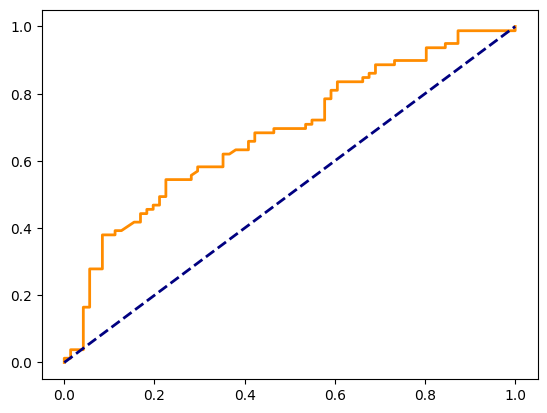

In [136]:
plot_rocs(fprs, tprs, auc)

In [137]:
from sklearn.metrics import confusion_matrix
df_test['y_hat'] = 1*(df_test['predictive_prob']>=0.4)
tn, fp, fn, tp = confusion_matrix(y_true=df_test['HeartDisease'],
                                 y_pred=df_test['y_hat']).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
accuracy = (tn+tp)/(tn+tp+fn+fp)
print ('Sensitivity (TPR):', sensitivity)
print('Specificity (TNR):', specificity)
print('False Positive Rate (FPR):', 1-specificity)
print('Accuracy:', accuracy)

Sensitivity (TPR): 0.7215189873417721
Specificity (TNR): 0.4507042253521127
False Positive Rate (FPR): 0.5492957746478873
Accuracy: 0.5933333333333334


This possibly suggests that Cholesterol was overfitting the logistic regression model since the reduced model had a higher AUC value. However, more analysis is needed to firmly suggest that Cholesterol is overfitting. We can see that the ROC curve does not have any classification (fpr,tpr) values that are very close to the ideal classification scenario of (FPR = 0, TPR=1). This is also demonstrated with a test AUC score of 0.68122, which is much lower than 1. Using the logistic regression model without Cholesterol to classify observations in the test dataset will not yield close to perfect classifications, regardless of what predictive probability threshold that we might use. Nevertheless, the test dataset AUC is closer to 1(ideal scenario) than it is to 0.5 ("realistic" worst case scenario), thus there does exist a test dataset classification (for a given predictive probability threshold) that is much better than simply just randomly assigning observations as a 0 or 1. 

The fpr indicates the proportion of cases that are incorrectly predicted as having heart disease among all the cases that do not actually have heart disease. The fpr is approximately 0.549, meaning that about 54.9% of the cases that do not have heart disease are falsely predicted as positive by the model. The tpr is the proportion of actual positive cases (patients with heart disease) that are correctly identified by your model as positive. The TPR is approximately 0.722, indicating that the model correctly identifies about 72.2% of the actual cases of heart disease.

We should use a probability threshold of .3 with a fpr of .2 and tpr of .8. This is because we want to make sure we are very certain someone has heart disease, having a high tpr, while a not as high tnr.

## 8. Additional Analysis/Insight

 The silhouette score of 0.4476 suggests that clustering the dataset could offer some insights into predictive probability. While the score indicates a correlation, it falls below the threshold of 0.5, indicating a relatively weak correlation. Therefore, while K-means clustering might provide some additional understanding, its utility is limited due to the silhouette score not meeting the desired threshold. In essence, while it may offer marginal benefits to the predictive probability analysis, its relevance and significance remain somewhat uncertain given the relatively low score.

In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=100)
num_cols=df_train[['HeartDisease','Cholesterol','RestingBP','Age']]
kmeans.fit(num_cols)

/Users/evelinaastranskas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=100)

In [139]:
df_train['cluster'] = kmeans.labels_

In [140]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(num_cols, kmeans.labels_)
print('Silhouette Score: ', sil_score)

Silhouette Score:  0.4476095913336839


## 9. Conclusion

Our primary research goal of the analysis was to Build a predictive model that will effectively predict “HeartDisease” for new datasets. Based on the performance metrics that we have for our model, including an Area Under the ROC Curve (AUC) of 0.6812, a False Positive Rate (FPR) of 0.5493, and a True Positive Rate (TPR) of 0.7215, I would cautiously advise healthcare professionals to use our predictive model but with some reservations. An AUC value of 0.68 shows that the model's ability to distinguish between individuals with heart disease and those without is moderately effective. AUC values range from 0 to 1, and the higher the value the better the determination is. While an AUC of approximately 0.68 is better than random chance (AUC = 0.5), one could still suggest that the model's predictive performance could be further improved. In addition to that, the FPR represents the proportion of false alarms among all individuals without heart disease, while the TPR of 0.7215 represents the proportion of correctly identified individuals with heart disease. In this case, the FPR indicates that approximately 54.93% of individuals without heart disease are incorrectly classified as having the disease, while the TPR suggests that about 72.15% of individuals with heart disease are correctly identified. While these numbers suggest that the model does not have terrible performance, healthcare professionals should still be considerate about the implications of these results when deliberating about patient care. The FPR is relatively high, meaning that a good amount of individuals without heart disease may receive false positive results. This could cause unnecessary anxiety, further testing, or interventions for the patients and professionals. 

However the model we made would be better than some other models due to the fact that it had the highest AUC fit to our test dataset. Like always, improvement could be made, and we have used more solid methods to get the highest AUC possible. One example could be another regression model such as forwards or regularization with cross validation, or even using a LASSO model instead of a reduced one like we used. These could have possibly led to us finding a model with a higher AUC. LASOO models reduce the number of variance and mitigates the risk of overfitting to noisy or irrelevant features and provides a more reliable estimation of the true underlying relationships in the data. In addition, including more explanatory variables from the original dataset could facilitate results that are more concrete and help in finding a higher AUC suited to our primary research goal. One other shortcoming that we did run into was that we may have over-cleaned our dataset. We removed several outliers that could have been more representative of typical data points and occurrences that happen within the study. Also, the issue of multicollinearity is always present because of the relationship between categorical and numerical variables. 

## References

Khader, Shameer & Johnson, Kipp & Glicksberg, Benjamin & Sengupta, Partho. (2018). Machine learning in cardiovascular medicine: Are we there yet?. Heart. 104. heartjnl-2017. 10.1136/heartjnl-2017-311198. 

Krittanawong, C., Virk, H. U. H., Bangalore, S., Wang, Z., Johnson, K. W., Pinotti, R., Zhang, H., Kaplin, S., Narasimhan, B., Kitai, T., Baber, U., Halperin, J. L., & Tang, W. H. W. (2020). Machine learning prediction in cardiovascular diseases: a meta-analysis. Scientific reports, 10(1), 16057. https://doi.org/10.1038/s41598-020-72685-1